In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [53]:
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# **EDA**

In [54]:
#Missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [55]:
df.shape

(400, 11)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [57]:

df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [58]:
company_val = []
for value in df["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

df["company_val"]= company_val
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ShelveLoc"] = le.fit_transform(df["ShelveLoc"])
df["Urban"] = le.fit_transform(df["Urban"])
df["US"] = le.fit_transform(df["US"])
df["company_val"] = le.fit_transform(df["company_val"])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [60]:
x1 = df.drop(['company_val','Sales'], axis =1)
y1 = df['company_val']
x1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [61]:
# split into training and testing data
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x1,y1,test_size=0.2,random_state=43 )

# **Model Building**

In [62]:
model1 = DecisionTreeClassifier(criterion = "gini",max_depth=3)

In [63]:
model1.fit(xtrain1,ytrain1)

DecisionTreeClassifier(max_depth=3)

In [64]:
ypred1 = model1.predict(xtest1)

In [65]:
print(classification_report(ytest1,ypred1))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.67      0.73      0.70        41

    accuracy                           0.68        80
   macro avg       0.68      0.67      0.67        80
weighted avg       0.68      0.68      0.67        80



In [66]:
model1.score(xtrain1,ytrain1)

0.790625

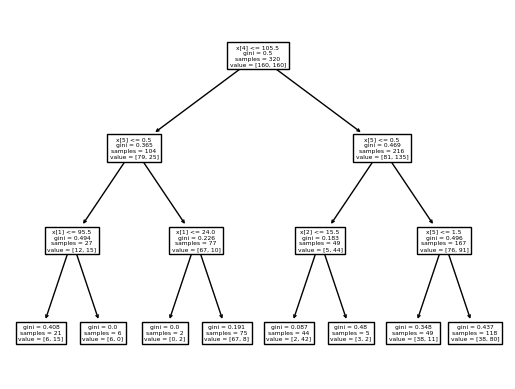

In [67]:
tree.plot_tree(model1)
plt.show()

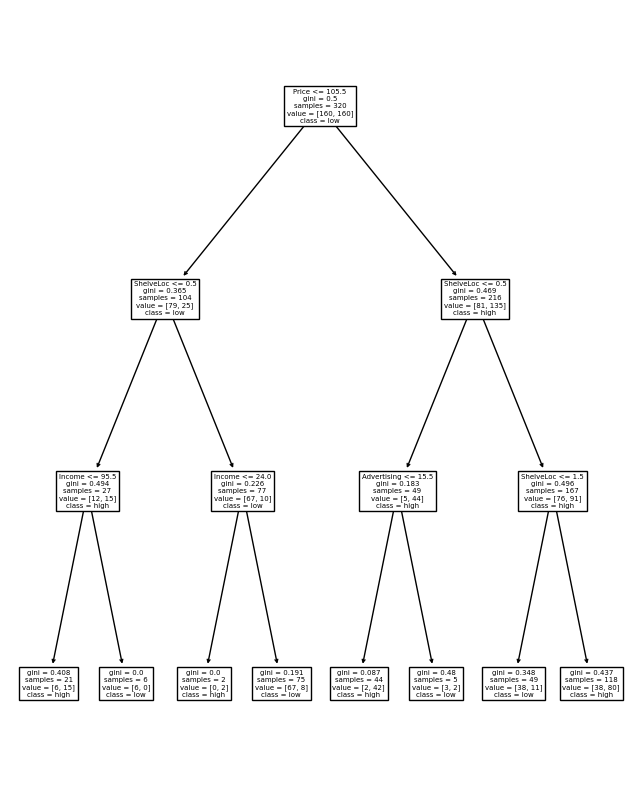

In [68]:
fn = x.columns
cn =['low', 'high']
plt.figure(figsize=(8,10))
tree.plot_tree(model1, feature_names = fn, class_names= cn)
plt.show()

In [69]:
model1.feature_importances_

array([0.        , 0.12628136, 0.04430277, 0.        , 0.33321185,
       0.49620401, 0.        , 0.        , 0.        , 0.        ])

In [70]:
fn

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

# **Other modeling**

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
model2 = DecisionTreeRegressor(max_depth=4)

In [73]:
model2.fit(xtrain1,ytrain1)

DecisionTreeRegressor(max_depth=4)

In [74]:
ypred1 = model2.predict(xtest1)

In [75]:
model2.score(xtrain1,ytrain1)

0.5288581489908216

In [76]:
ypred1 = np.round(ypred1,0)

In [77]:
ypred1

array([1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [78]:
ytest1

55     1
271    1
390    1
105    1
223    1
      ..
126    0
140    1
360    0
289    0
183    1
Name: company_val, Length: 80, dtype: int64

In [79]:
# check the accuracy b/w the ypred1 and ytest1
from sklearn.metrics import r2_score
r2_score(ytest1,ypred1)

-0.20075046904315164